# Problem Statement: Concrete Strength Prediction 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.show()
%matplotlib inline 
# To enable plotting graphs in Jupyter notebook
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

# 1. Univariate analysis 

In [45]:
#Load the file from local directory using pd.read_csv which is a special form of read_table
conc_df = pd.read_csv("concrete.csv")
conc_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29


In [46]:
conc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [47]:
conc_df.shape

(1030, 9)

In [48]:
conc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,"1,030.00",281.17,104.51,102.00,192.38,272.90,350.00,540.00
slag,"1,030.00",73.90,86.28,0.00,0.00,22.00,142.95,359.40
ash,"1,030.00",54.19,64.00,0.00,0.00,0.00,118.30,200.10
water,"1,030.00",181.57,21.35,121.80,164.90,185.00,192.00,247.00
superplastic,"1,030.00",6.20,5.97,0.00,0.00,6.40,10.20,32.20
coarseagg,"1,030.00",972.92,77.75,801.00,932.00,968.00,"1,029.40","1,145.00"
fineagg,"1,030.00",773.58,80.18,594.00,730.95,779.50,824.00,992.60
age,"1,030.00",45.66,63.17,1.00,7.00,28.00,56.00,365.00
strength,"1,030.00",35.82,16.71,2.33,23.71,34.45,46.14,82.60


** cement, slag and age are right skewed numbers. ash and superplastic seems to be optional additions used in some some cases only. 

In [49]:
conc_df.isnull().apply(pd.value_counts)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
False,1030,1030,1030,1030,1030,1030,1030,1030,1030


**no missing values, zero values in 'slag','ash','superplastic' is not unrealistic. 

In [50]:
dup_df=conc_df[conc_df.duplicated()]

In [51]:
dup_df.shape

(25, 9)

In [52]:
dup_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.00,106.30,0.00,153.50,16.50,852.10,887.10,3,33.40
298,425.00,106.30,0.00,153.50,16.50,852.10,887.10,3,33.40
400,362.60,189.00,0.00,164.90,11.60,944.70,755.80,3,35.30
420,362.60,189.00,0.00,164.90,11.60,944.70,755.80,3,35.30
463,362.60,189.00,0.00,164.90,11.60,944.70,755.80,56,77.30


** There are 25 duplicate values. 

In [53]:
nconc_df=conc_df.drop_duplicates()

In [54]:
nconc_df.shape

(1005, 9)

In [55]:
nconc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,"1,005.00",278.63,104.34,102.00,190.70,265.00,349.00,540.00
slag,"1,005.00",72.04,86.17,0.00,0.00,20.00,142.50,359.40
ash,"1,005.00",55.54,64.21,0.00,0.00,0.00,118.30,200.10
water,"1,005.00",182.08,21.34,121.80,166.60,185.70,192.90,247.00
superplastic,"1,005.00",6.03,5.92,0.00,0.00,6.10,10.00,32.20
coarseagg,"1,005.00",974.38,77.58,801.00,932.00,968.00,"1,031.00","1,145.00"
fineagg,"1,005.00",772.69,80.34,594.00,724.30,780.00,822.20,992.60
age,"1,005.00",45.86,63.73,1.00,7.00,28.00,56.00,365.00
strength,"1,005.00",35.25,16.28,2.33,23.52,33.80,44.87,82.60


## 2. Bi-variate analysis

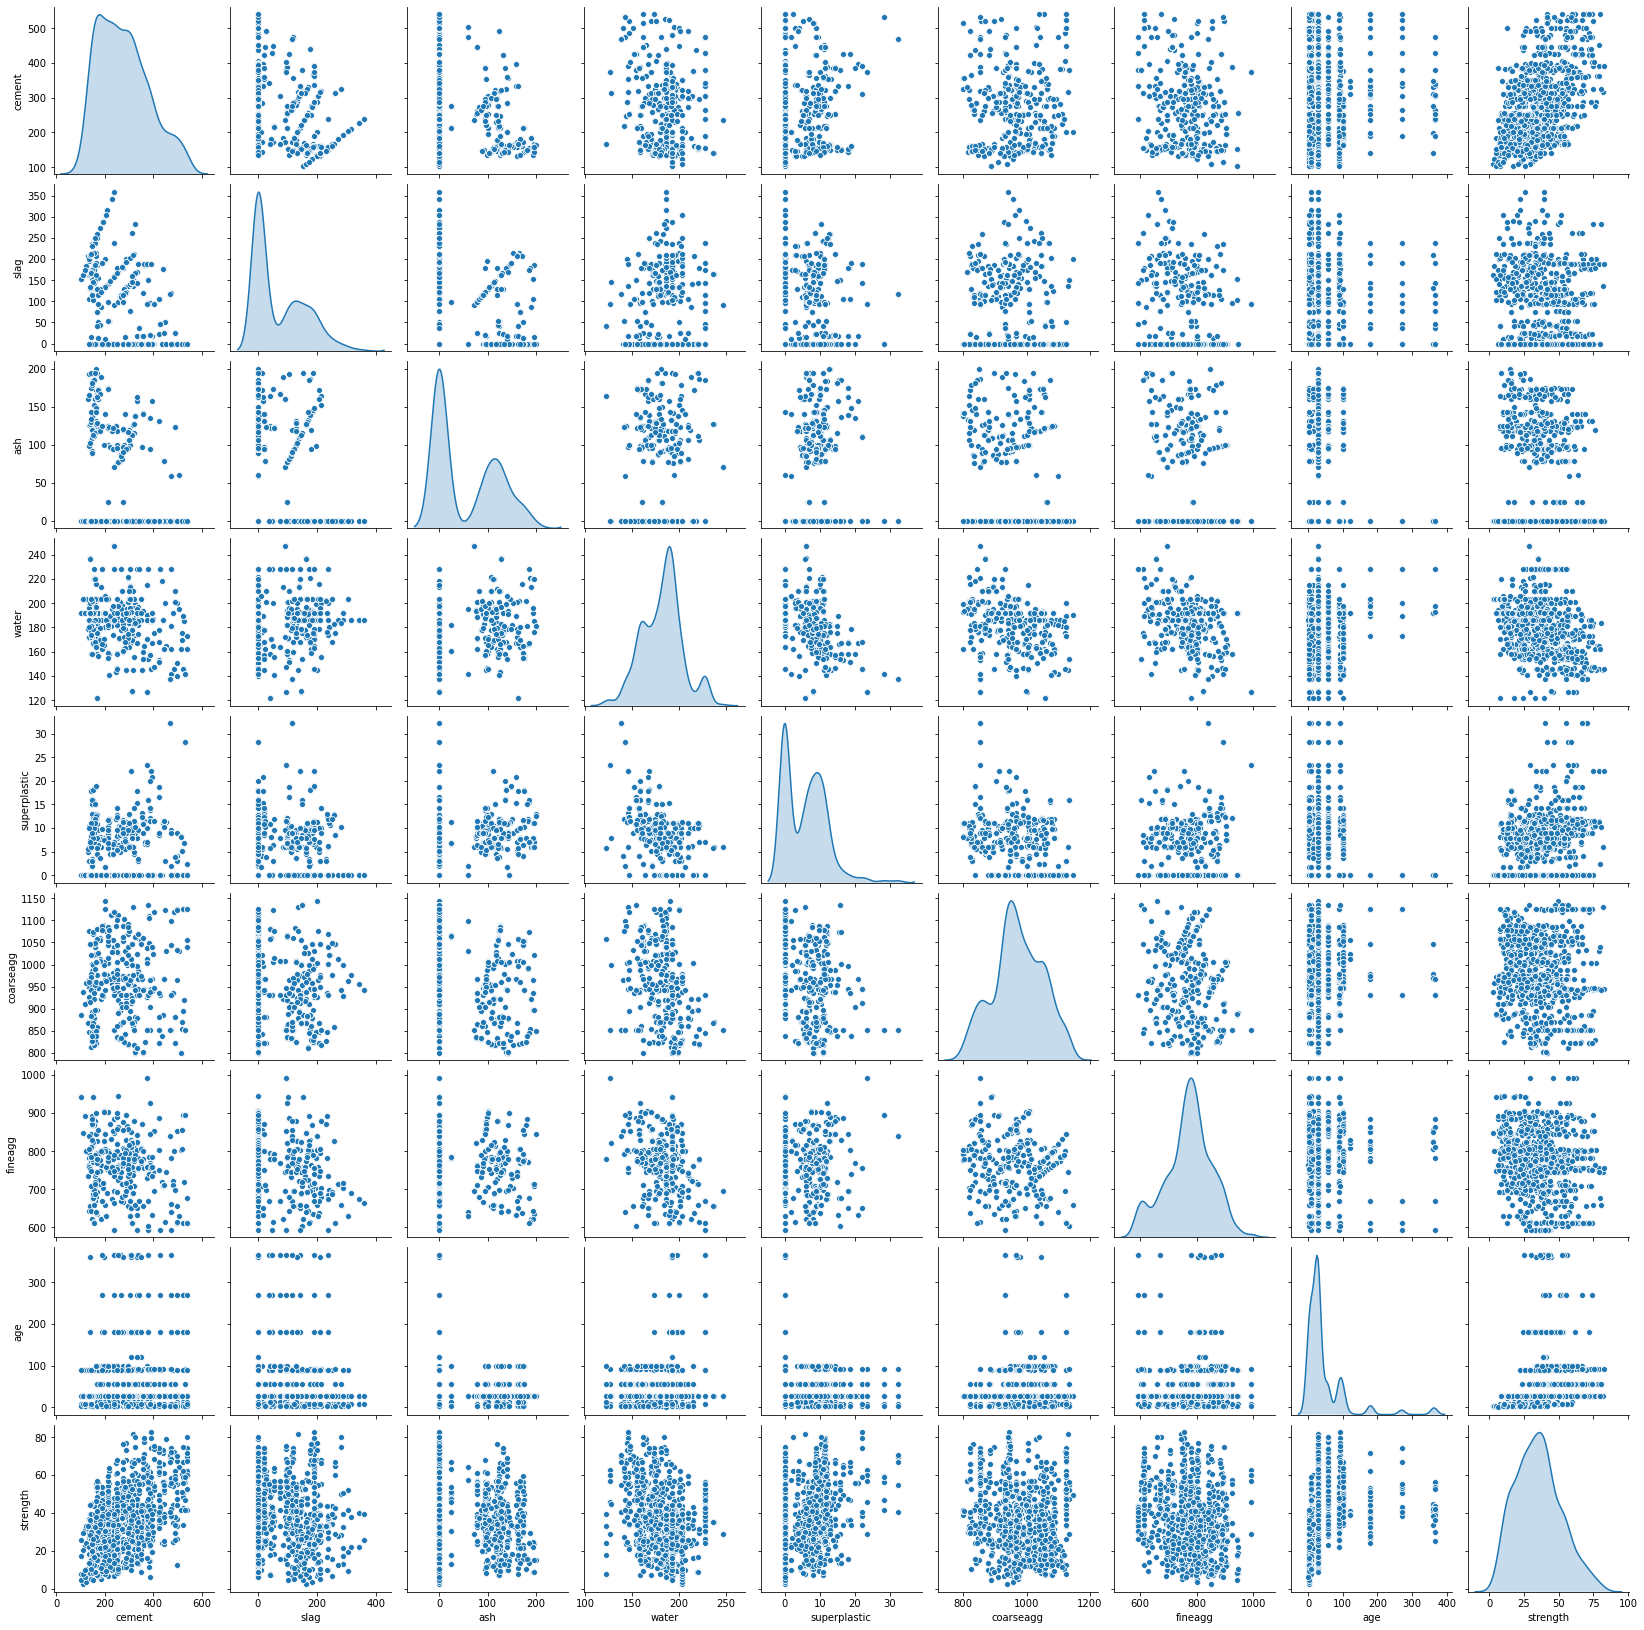

In [56]:
sns.pairplot(nconc_df, diag_kind='kde')

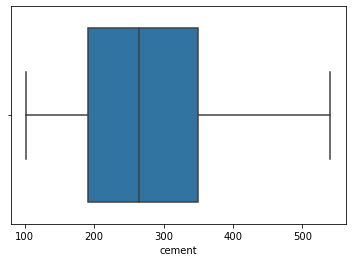

In [57]:
sns.boxplot(nconc_df['cement'])

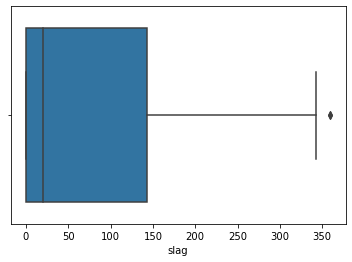

In [58]:
sns.boxplot(nconc_df['slag'])

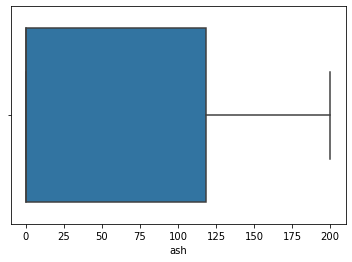

In [59]:
sns.boxplot(nconc_df['ash'])

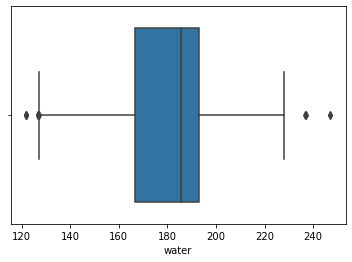

In [60]:
sns.boxplot(nconc_df['water'])

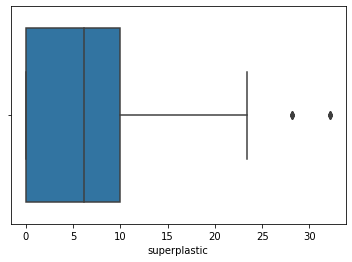

In [61]:
sns.boxplot(nconc_df['superplastic'])

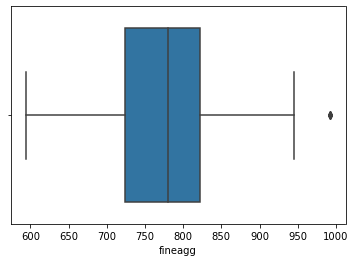

In [62]:
sns.boxplot(nconc_df['fineagg'])

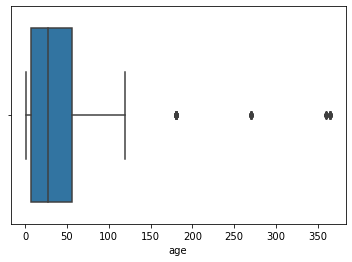

In [63]:
sns.boxplot(nconc_df['age'])

** there are high number of zero values in slag, ash and superplastic , so the data set is not balanced. In the box plot it is clearly showing that the slag is a highly imbalance data with many zeros' which make the mean closer to zero and couple of outliers that are sitting very far out. 

## 3. Feature Engineering techniques

In [64]:
nconc_df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.00,-0.30,-0.39,-0.06,0.06,-0.09,-0.25,0.09,0.49
slag,-0.30,1.00,-0.31,0.13,0.02,-0.28,-0.29,-0.04,0.10
ash,-0.39,-0.31,1.00,-0.28,0.41,-0.03,0.09,-0.16,-0.08
water,-0.06,0.13,-0.28,1.00,-0.65,-0.21,-0.44,0.28,-0.27
superplastic,0.06,0.02,0.41,-0.65,1.00,-0.24,0.21,-0.19,0.34
coarseagg,-0.09,-0.28,-0.03,-0.21,-0.24,1.00,-0.16,-0.01,-0.14
fineagg,-0.25,-0.29,0.09,-0.44,0.21,-0.16,1.00,-0.16,-0.19
age,0.09,-0.04,-0.16,0.28,-0.19,-0.01,-0.16,1.00,0.34
strength,0.49,0.10,-0.08,-0.27,0.34,-0.14,-0.19,0.34,1.00


** In addition to the my analysis of very high imbalance in 'slag' data under the question number 2 , when reveiwing the correlation, I it has the lowest correlation with the strength. So I'm recomending to take the slag off from this data analysis. 

In [65]:
fconc_df=nconc_df.drop('slag',axis=1)

In [66]:
fconc_df.shape

(1005, 8)

In [111]:
X =fconc_df.drop('strength', axis=1)
y =fconc_df[['strength']]

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [114]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [115]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.04893945247649931
The coefficient for ash is -0.021513612778927754
The coefficient for water is -0.40215685380889715
The coefficient for superplastic is 0.31272908441106206
The coefficient for coarseagg is -0.05499601747383413
The coefficient for fineagg is -0.0650715826255127
The coefficient for age is 0.1026825535250658


In [116]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 193.27658868923004


In [117]:
regression_model.score(X_train, y_train)

0.5773564300929284

In [118]:
regression_model.score(X_test, y_test)

0.5219315340819763

** Is OLS a good model ? Should we building a simple linear model ? Check the residuals for each predictor.

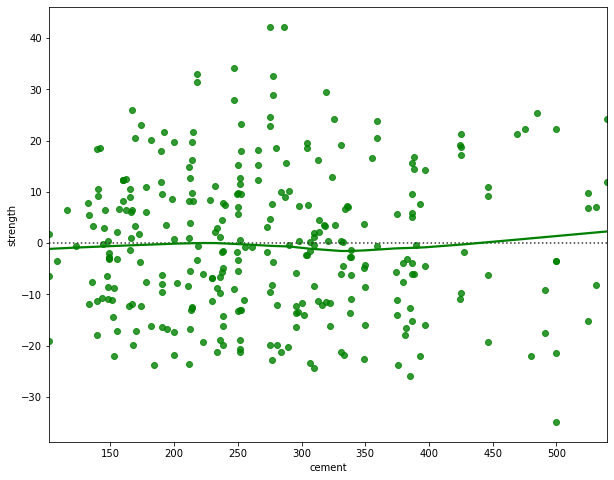

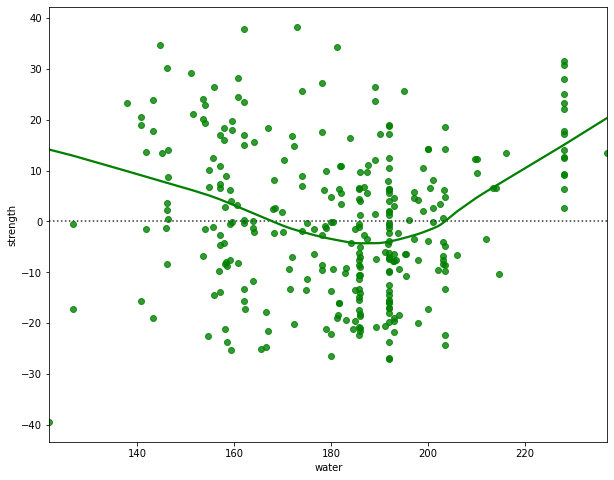

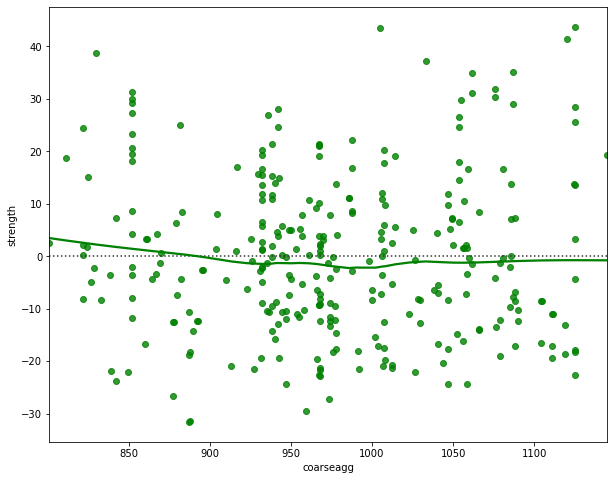

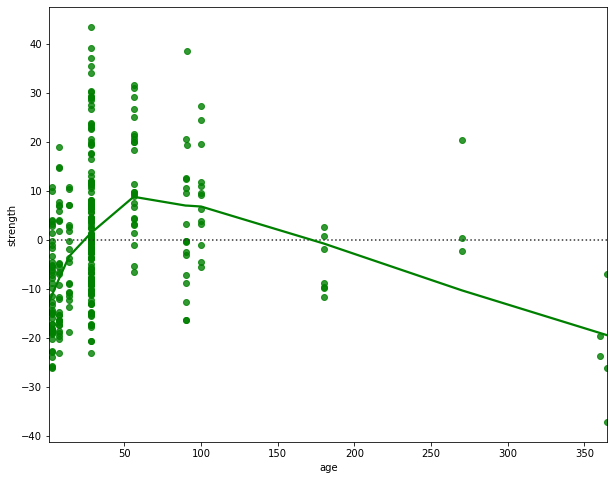

In [119]:
fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['cement'], y= y_test['strength'], color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['water'], y= y_test['strength'], color='green', lowess=True )

fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['coarseagg'], y= y_test['strength'], color='green', lowess=True )

fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['age'], y= y_test['strength'], color='green', lowess=True )

In [120]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,cement,ash,water,superplastic,coarseagg,fineagg,age,strength
443,190.30,125.20,166.60,9.90,"1,079.00",798.90,56,31.72
689,194.70,100.50,165.60,7.50,"1,006.40",905.90,56,33.96
1022,144.80,133.60,180.80,11.10,979.50,811.50,28,13.20
826,139.70,127.70,236.70,5.80,868.60,655.60,28,35.23
758,194.70,100.50,170.20,7.50,998.00,901.80,56,43.39


In [121]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'strength ~ cement+ash+water+superplastic+coarseagg+fineagg+fineagg+age', data = data_train).fit()
lm1.params

Intercept      193.28
cement           0.05
ash             -0.02
water           -0.40
superplastic     0.31
coarseagg       -0.05
fineagg         -0.07
age              0.10
dtype: float64

In [122]:
print(lm1.summary()) 

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     135.6
Date:                Sat, 26 Sep 2020   Prob (F-statistic):          1.85e-125
Time:                        10:59:24   Log-Likelihood:                -2672.9
No. Observations:                 703   AIC:                             5362.
Df Residuals:                     695   BIC:                             5398.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      193.2766     16.987     11.378   

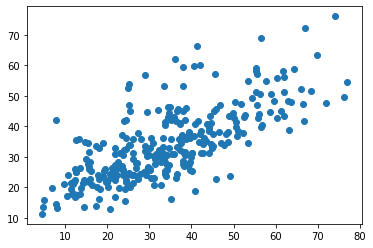

In [123]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['strength'], y_pred)

## Creating the model and tuning it

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [139]:
array = fconc_df.values
X = array[:,0:7]
Y = array[:,7]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

num_folds = 50
seed = 7


kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc')
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
Accuracy: nan% (nan%)


In [149]:
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
data = fconc_df
values = data.values
# configure bootstrap
n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(data) * 0.30)    # picking only 30 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = DecisionTreeClassifier()
	model.fit(train[:,:-1], train[:,-1])
    # evaluate model
	predictions = model.predict(test[:,:-1])
	score = round(accuracy_score(test[:,-1], predictions),2)    # caution, overall accuracy score can mislead when classes are imbalanced
	print(score)
	stats.append(score)

ValueError: Unknown label type: 'continuous'

## Grid Search 

In [151]:
from sklearn import datasets

X = conc_df.data[:,2:]
y = conct_df.target
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,random_state = 7)

AttributeError: 'DataFrame' object has no attribute 'data'

In [152]:
from sklearn.neighbors import KNeighborsClassifier
### Number of nearest neighbors
knn_clf = KNeighborsClassifier()

In [153]:
knn_clf.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [154]:
from sklearn.metrics import accuracy_score

In [155]:
param_grid = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }

In [156]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(knn_clf,param_grid,cv=10)

In [157]:
gs.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'